<a href="https://colab.research.google.com/github/lucianomcsilva/RIWRS/blob/main/%5BRIWRS%5D_4_An%C3%BAncios_Classificados_do_OLX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

Utilizando o conhecimento obtido na trilha 3, obtivemos mais de 75 mil anuncios classificados na secção de cachorros do site OLX Brasil e está disponivel no link 
[texto do link](https://)

## instalando todas as dependencias

In [1]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 27.3 MB/s 


## Abrindo a corpora e fazendo inspenção visual

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lucianomcsilva/ANUNCIOS_OLX/main/olx.csv')

titles = df[['title']].copy()
titles.head(10)

,title
0,Bulldog Francês (VARIAS CORES DISPONÍVEIS)
1,Pug Macho disponível pra entrega
2,Lindíssimo filhote de shih tzu machinho Black ...
3,Lindíssimo Filhote de shih tzu machinho com Pe...
4,Filhotes de Rottweiler
5,Rottweiler alto padrão
6,"Yorkshire com pedigree , em loja !!!"
7,Fox Paulistinha alto padrão
8,Filhote de shitzu macho
9,Pug alto padrão


## Nuvem de palavras
Montando uma nuvem de palvras, antes de qualquer pre-tratamento

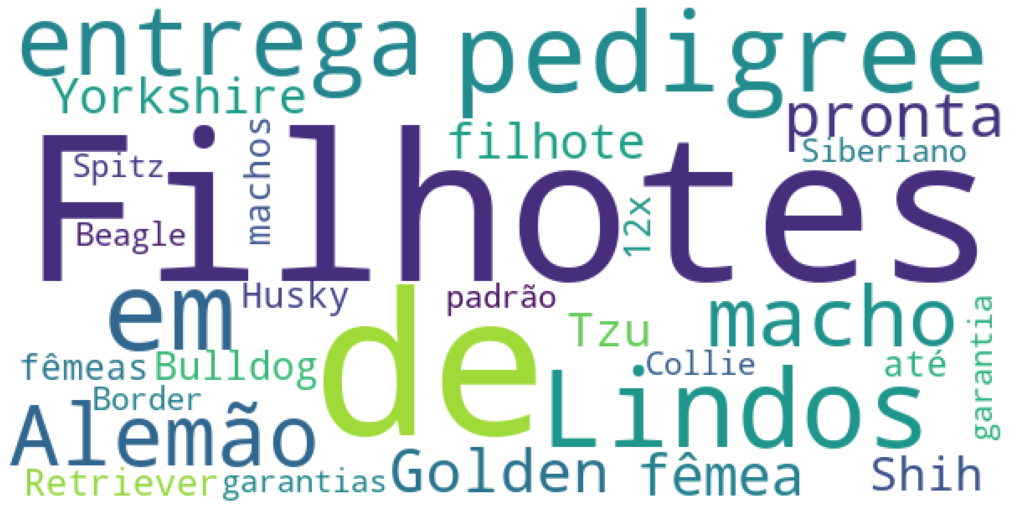

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

original_text = ' '.join(titles['title'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(original_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = 'White') 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


# Pré-tratamento
FAzendo os pré-tratamentos explicados no e-book

## Importando a função de singularização

In [ ]:
"""
Thanks for https://simasware.wordpress.com/2014/02/28/pluralizacao-em-pt-br-rails/
"""

import re
import unicodedata
import string

INVARIAVEL = [  'lápis',
                'atlas',
                'pires',
                'ônibus',
                'vírus',
                'bônus',
                'ônus',
                'cais',
                'xis',
                'óculos',
                'ourives',
                'parabéns',
                'atras',

            ]

def singularizar(PalavraOriginal):
    """ Remove acentos e deixa tudo minuscula"""
    palavra = PalavraOriginal.lower()

    # for wd in INVARIAVEL:
    #     if transliterate(wd).lower() == palavra:
    #         return palavra

    """      Lista de regras, composto em tuplas de valor a ser buscado e regra de substituição    """
    rules = []

    """    Palavras terminadas em ns    """
    rules.append((r"^([a-zA-z]*)ns$", r"\1m"))

    """ Palavras terminas em r ou z luzes - luz, flores - flor, arrozes - arroz"""
    rules.append((r"^([a-zA-z]*)res$", r"\1r"))
    rules.append((r"^([a-zA-z]*)zes$", r"\1z"))
    rules.append((r"^([a-zA-z]*)ses$", r"\1s"))

    """    Palavras terminadas em ão    """
    rules.append((r"^([a-zA-z]*)oes$", r"\1ao"))
    rules.append((r"^([a-zA-z]*)aos$", r"\1ao"))
    rules.append((r"^([a-zA-z]*)aes$", r"\1ao"))

    """ Palavras regulares, casos simples: carros, arvores, aboboras"""
    rules.append((r"^([a-zA-z]*)(a|e|o|u)is$", r"\1\2l"))

    """ Palavras terminas em il  cantis - cantil """
    rules.append((r"^([a-zA-z]*)is$", r"\1il"))

    """ Palavras terminas em les  mal - males, mel - meles """
    rules.append((r"^([a-zA-z]*)les$", r"\1l"))


    """ Palavras regulares, casos simples: carros, arvores, aboboras"""
    rules.append((r"^([a-zA-z]*)(a|e|i|o|u)s$", r"\1\2"))
    
    for rule in rules:
        if re.match(rule[0], palavra) is not None:
            return re.sub(rule[0], rule[1], palavra, 1, re.IGNORECASE)
    return palavra

## Aplicando pré-tratamento

In [47]:
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode
import string
nltk.download('stopwords')

stop = stopwords.words('portuguese')

#Transforma em minuscula e remoção de acentos 
titles['title_treated'] = titles['title'].str.lower()
titles['title_treated'] = titles['title_treated'].apply(lambda x: unidecode(x))

# remocação de pontuaçao
titles['title_treated'] = titles['title_treated'].str.replace('[{}]'.format(string.punctuation), '')

# remocação de numeros
titles['title_treated'] = titles['title_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada
titles['title_treated'] = titles['title_treated'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))

# Removendo plural
#titles['title_treated'] = titles['title_treated'].apply(lambda x: ' '.join([singularizar(word) for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.


In [48]:
titles.sample(10)

,title,title_treated
69847,Pastor Alemão - Filhotes Lindos e Saudáveis,pastor alemao filhotes lindos saudaveis
63506,Casinha de cachorro grande usada,casinha cachorro grande usada
53347,Golden retire em loja para sua tranquilidade 9...,golden retire loja tranquilidade
72954,"Lulu da Pomerania filhote, para a sua família $$",lulu pomerania filhote familia
30950,Bulldog francês com pedigree e micro chip em a...,bulldog frances pedigree micro chip ate x
37596,Lindos cachorro yorshere filhotes,lindos cachorro yorshere filhotes
39187,Spitz Alemão -Disponíveis Em Loja,spitz alemao disponiveis loja
34906,Golden com garantia de saúde + pedigree,golden garantia saude pedigree
45556,"Filhotinhos de Beagle, machos e fêmeas $$",filhotinhos beagle machos femeas
66132,"Golden Retriever filhotes, macho e fêmea pront...",golden retriever filhotes macho femea pronta e...


## Gerando imagem pós pré-tratamento

### xerentando em forma de tabela primeiro =)

In [22]:
#cria uma lista com todos os tokens
from nltk.tokenize import word_tokenize
nltk.download('punkt')

big_line = ' '.join(sent for sent in titles['title_treated'])
tokens = word_tokenize(big_line)
fdist1 = nltk.FreqDist(tokens)
fdist1 = sorted(fdist1.items(), key=lambda x: x[1], reverse=True)
pd_freq = pd.DataFrame.from_dict(fdist1)
n = 0
pd_freq.iloc[n:n+20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,0,1
0,filhotes,22373
1,pedigree,8579
2,lindos,8328
3,entrega,7390
4,femea,5950
5,alemao,5718
6,macho,5596
7,pronta,5535
8,golden,5512
9,yorkshire,4979


### Nuvem de palavras

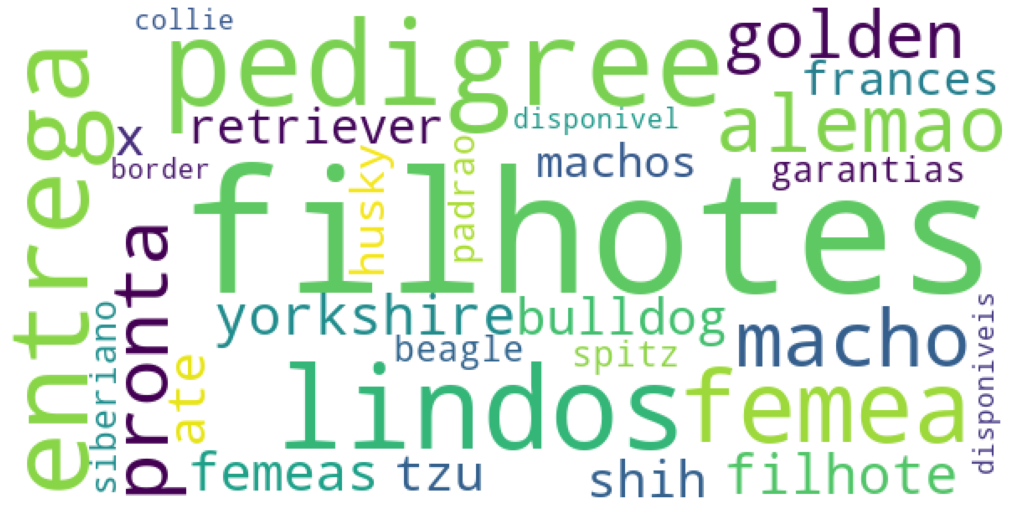

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# from nltk.tokenize import word_tokenize

treated_text = ' '.join(titles['title_treated'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(treated_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

## Remoção de palavras ignoradas

In [49]:
ignorewords = [ 'machinho', 'macho', 'machos', 'femea', 'femeas', 'pedigree', 'pronta', 'pronto', 'prontos', 'entrega', 'lindissimo', 'lindissimos', 
                'lindinhos', 'lindinho', 'lindinhas', 'lindinha',  'lindo', 'lindas', 'fofinhos', 'incriveis', 'lindos', 'linda', 'fofos', 'disponiveis', 'disponivel', 'garantia', 'garantias', 'microchip', 'chip', 'saude', 'hoje', 'suporte', 
                'contrato', 'ate', 'padrao', 'raca', 'racas', 'ja', 'loja', 'dias', 'vendo', 'compro', 'vende', 'compra', 'venda', 'veterinario', 'voce', 'maravilhosos', 'promocao', 
                'vacinados', 'c', 'juros', 'whats', 'whatsapp', 'ligue', 'so', 'total', 'gratuito', 'todas', 'todos', 'todo', 'toda', 'saudaveis', 'saudavel', 'todas', 'pra', 'venha', 
                'clinicas', 'informacoes', 'melhores', 'vida', 'entregamos', 'confira', 'procedencia', 'belos', 'entregamos', 'adquira', 'adquirir', 'disposicao', 'veterinaria', 'vet',
                'tamanho', 'vacinas', 'vacinados', 'vacinada', 'adoraveis', 'adoravel', 'assistencia', 'lojas', 'pura', 'porte',  'parcelamos', 'seguranca', 'chamar', 'condicao', 'condicoes', 'polegadas',
                'perfeitos',  'vet', 'top', 'bem', 'melhor', 'cartao', 'casa', 'garanta', 'capa', 'r', 'amigo', 'amor', 'amoroso', 'amorosos', 'super', 'hiper', 'face', 'contato', 'descricao',
                'imediata', 'aqui', 'alexandre', 'belissimos', 'meses', 'conhecer', 'contato', 'novo', 'vez', 'vezes', 'x', 'docil', 'bebe', 'bebes', 'namorada', 'sp', 'sim', 'nao', 'chame', 'info',
                'companhia', 'varias', 'qualidade', 'companhia', 'procuro', 'vermifugado', 'conferir', 'hrs', 'hora', 'horas', 'ainda', 'unica', 'leia', 'veja', 'veje', 'ver', 'alegria', 'feliz',
                'felicidade', 'procura', 'visitar', 'visita', 'conheca', 'fotos', 'ideal', 'proprias', 'reais', 'transporte', 'puros', 'hs', 'oferecemos', 'lar', 'casa', 'apartamento', 'apto', 'apt',
                'oportunidade', 'companheiro', 'belo', 'vendese', 'reserva', 'reserve', 'pelagem', 'excelente', 'brincalhao', 'sonho', 'preco', 'exclusivas', 'exclusivos', 'exclusiva', 'exclusivo',
                'exclusividade', 'exclusividades', 'beneficios', 'pagamento', 'unico', 'unicos', 'unica', 'unicas', 'sonho', 'servicos', 'otimo', 'otimos', 'otima', 'otimas',
                'dia', 'gratis', 'via', 'fofura', 'retirada', 'parcelamento', 'vai', 'chama', 'cinza', 'preto', 'preta', 'branco', 'chocolate', 'cachorro', 'legitimo', 'cabeca', 'ultimo', 'fisica', 'cabeca', 
               #tamanhos
                'tamanho', 'tamanhos', 'linhagem', 'adulto', 'cm', 'vermifugados', 'vacina', 'canil', 'conosco', 'filhote', 'filhotes', 'filhotinho', 'filhotinhos', 'olhos', 'olho', 'vacinado', 'maravilhoso',
               #cores
                'caramelo', 'amarelo', 'white', 'black', 'vermelho', 'brancochocolate', 'merle', 'merlepreto', 'merlered', 'azul', 'azuis' ]

titles['title_treated_ignored'] = titles['title_treated'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (ignorewords)]))
#titles['title_treated'] = titles['title_treated']

In [11]:
titles.sample(10)

,title,title_treated
74648,Lindos Filhotes A Pronta Entrega Pastor Alemão...,pastor alemao belga malinois
50871,"Golden Retriever bem parrudos e fortes, *",golden retriever parrudos fortes
44034,Pug legítimo,pug
21702,Lindas feminhas de shitzu!!(a pronta entrega),feminhas shitzua
19776,Maltês disponível,maltes
15508,American Bully,american bully
70544,Belos filhotes de Beagle,beagle
31369,Maravilhosos filhotes de Husky Siberiano,husky siberiano
45132,Filhotes A Venda,
34404,Coleira com Guia SFC,coleira guia sfc


### Nuvem de palavras


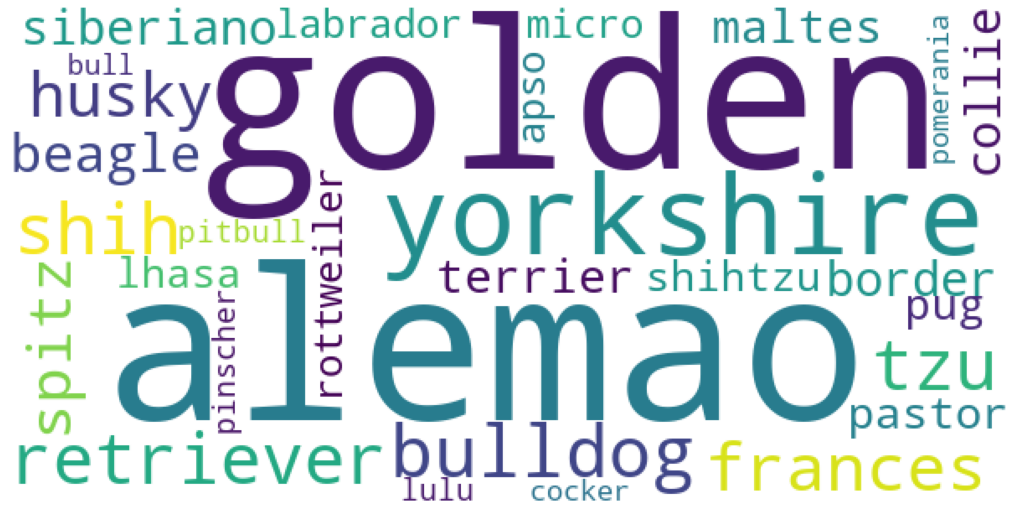

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

treated_text = ' '.join(titles['title_treated'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(treated_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

# Bigramas
por fim, para conseguir identificar as raças, vamos trabalhar com bigramas, conforme explicado no e-book


# Gerando os bigramas

In [52]:
from nltk import FreqDist
from nltk.util import ngrams    
import nltk
nltk.download('punkt')


treated_text = ' '.join(titles['title_treated_ignored'])
#bigram_fd = nltk.FreqDist(nltk.bigrams(word_tokenize(treated_text)))
bigram_fd = nltk.FreqDist(nltk.ngrams(nltk.word_tokenize(treated_text), 3))

sorted_bgm = sorted(bigram_fd.items(), key=lambda x: x[1], reverse=True)
tokens_bigram = dict((' '.join(text), count) for text, count in sorted_bgm)
# tokens_bigram

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
pd.DataFrame.from_dict(tokens_bigram, orient="index").reset_index()

,index,0
0,spitz alemao anao,468
1,yorkshire terrier micro,296
2,bull terrier ingles,246
3,golden retriever golden,196
4,border collie blue,194
...,...,...
87198,retriever inteligentes golden,1
87199,retriever beagle completa,1
87200,beagle completa border,1
87201,retriever labrador chow,1


## Nuvem de palavras

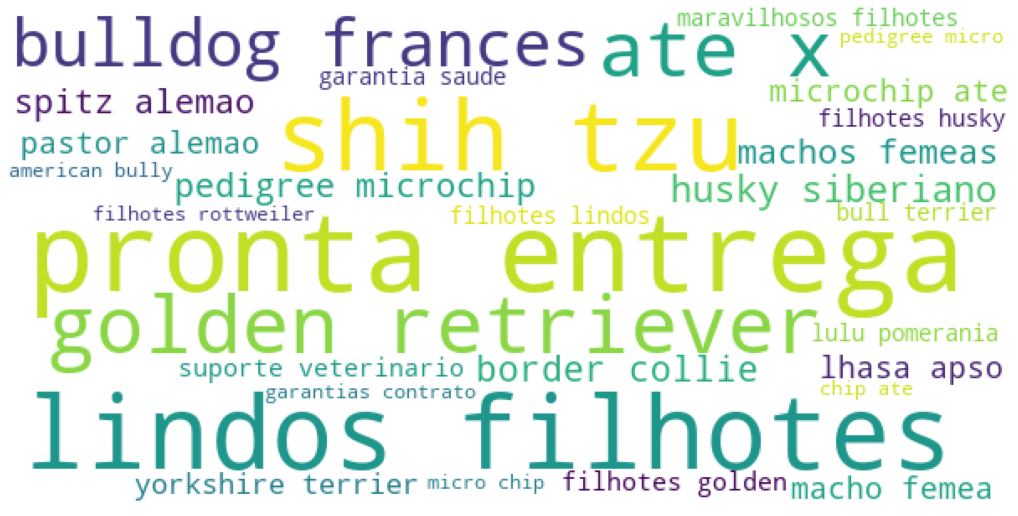

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wordcloud4 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate_from_frequencies(tokens_bigram)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()